In [264]:
import pandas as pd 
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

In [265]:
file_path = '/Users/mahsadorri/Downloads/loan_approval_dataset.csv' 
data = pd.read_csv(file_path)
print(data.head())


   loan_id   no_of_dependents      education  self_employed   income_annum  \
0        1                  2       Graduate             No        9600000   
1        2                  0   Not Graduate            Yes        4100000   
2        3                  3       Graduate             No        9100000   
3        4                  3       Graduate             No        8200000   
4        5                  5   Not Graduate            Yes        9800000   

    loan_amount   loan_term   cibil_score   residential_assets_value  \
0      29900000          12           778                    2400000   
1      12200000           8           417                    2700000   
2      29700000          20           506                    7100000   
3      30700000           8           467                   18200000   
4      24200000          20           382                   12400000   

    commercial_assets_value   luxury_assets_value   bank_asset_value  \
0                  1760000

In [266]:
data.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [267]:
data.describe(include="number")

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [268]:
print(data.dtypes)

loan_id                       int64
 no_of_dependents             int64
 education                   object
 self_employed               object
 income_annum                 int64
 loan_amount                  int64
 loan_term                    int64
 cibil_score                  int64
 residential_assets_value     int64
 commercial_assets_value      int64
 luxury_assets_value          int64
 bank_asset_value             int64
 loan_status                 object
dtype: object


In [269]:
data.columns = data.columns.str.strip()

# Corrected column name usage
data['self_employed'] = data['self_employed'].str.strip().str.lower().apply(lambda x: 0 if x == 'no' else 1)

In [270]:
print(data.head())

   loan_id  no_of_dependents      education  self_employed  income_annum  \
0        1                 2       Graduate              0       9600000   
1        2                 0   Not Graduate              1       4100000   
2        3                 3       Graduate              0       9100000   
3        4                 3       Graduate              0       8200000   
4        5                 5   Not Graduate              1       9800000   

   loan_amount  loan_term  cibil_score  residential_assets_value  \
0     29900000         12          778                   2400000   
1     12200000          8          417                   2700000   
2     29700000         20          506                   7100000   
3     30700000          8          467                  18200000   
4     24200000         20          382                  12400000   

   commercial_assets_value  luxury_assets_value  bank_asset_value loan_status  
0                 17600000             22700000       

In [271]:
print(data['education'].unique())

[' Graduate' ' Not Graduate']


In [272]:
# Convert the 'education' column to string and strip spaces
data['education'] = data['education'].astype(str).str.strip()

# Encode the 'education' column: 0 for 'Graduate', 1 for 'Not Graduate'
data['education'] = data['education'].apply(lambda x: 1 if x == 'Graduate' else 0)

# Display the first few rows to check the changes
print(data.head())

   loan_id  no_of_dependents  education  self_employed  income_annum  \
0        1                 2          1              0       9600000   
1        2                 0          0              1       4100000   
2        3                 3          1              0       9100000   
3        4                 3          1              0       8200000   
4        5                 5          0              1       9800000   

   loan_amount  loan_term  cibil_score  residential_assets_value  \
0     29900000         12          778                   2400000   
1     12200000          8          417                   2700000   
2     29700000         20          506                   7100000   
3     30700000          8          467                  18200000   
4     24200000         20          382                  12400000   

   commercial_assets_value  luxury_assets_value  bank_asset_value loan_status  
0                 17600000             22700000           8000000    Approved 

In [273]:
print("Unique values in 'loan_status':", data['loan_status'].unique())


Unique values in 'loan_status': [' Approved' ' Rejected']


In [274]:

data['loan_status'] = data['loan_status'].apply(lambda x: 1 if x.strip().lower() == 'approved' else 0)

print(data.head())


   loan_id  no_of_dependents  education  self_employed  income_annum  \
0        1                 2          1              0       9600000   
1        2                 0          0              1       4100000   
2        3                 3          1              0       9100000   
3        4                 3          1              0       8200000   
4        5                 5          0              1       9800000   

   loan_amount  loan_term  cibil_score  residential_assets_value  \
0     29900000         12          778                   2400000   
1     12200000          8          417                   2700000   
2     29700000         20          506                   7100000   
3     30700000          8          467                  18200000   
4     24200000         20          382                  12400000   

   commercial_assets_value  luxury_assets_value  bank_asset_value  loan_status  
0                 17600000             22700000           8000000            

In [275]:
data.drop('loan_id', axis = 1 , inplace = True)

In [276]:
# Identify outliers based on the 3-sigma rule
mean = data.mean()
std = data.std()
lower_bound = mean - 3 * std
upper_bound = mean + 3 * std

# Remove outliers from the data
outliers = (data < lower_bound) | (data > upper_bound)
data_cleaned = data[~outliers.any(axis=1)]

In [277]:
correlation_matrix=data.corr()
print(correlation_matrix)

                          no_of_dependents  education  self_employed  \
no_of_dependents                  1.000000   0.002697       0.000765   
education                         0.002697   1.000000      -0.023224   
self_employed                     0.000765  -0.023224       1.000000   
income_annum                      0.007266   0.011625       0.002368   
loan_amount                      -0.003366   0.010631       0.001450   
loan_term                        -0.020111  -0.008417       0.004107   
cibil_score                      -0.009998  -0.004649      -0.004866   
residential_assets_value          0.007376   0.010930       0.006144   
commercial_assets_value          -0.001531  -0.006763      -0.017998   
luxury_assets_value               0.002817   0.012471       0.004413   
bank_asset_value                  0.011163   0.009424      -0.000215   
loan_status                      -0.018114   0.004918       0.000345   

                          income_annum  loan_amount  loan_term 

In [278]:
# Assuming 'data' is your DataFrame
correlation_matrix = data.corr()

# Mask the diagonal (self-correlation) values
correlation_matrix_without_diag = correlation_matrix.mask(np.eye(correlation_matrix.shape[0], dtype=bool))

# Convert the correlation matrix to a series, filtering out NaN values
correlation_pairs = correlation_matrix_without_diag.unstack().dropna()

# Get the top 5 maximum correlations
top_5_max = correlation_pairs.nlargest(8)

# Get the top 5 minimum correlations
top_5_min = correlation_pairs.nsmallest(8)

# Output the results
print("Top 5 Maximum Correlations:")
for index, value in top_5_max.items():
    print(f"{index}: {value}")

print("\nTop 5 Minimum Correlations:")
for index, value in top_5_min.items():
    print(f"{index}: {value}")

Top 5 Maximum Correlations:
('income_annum', 'luxury_assets_value'): 0.9291454207522614
('luxury_assets_value', 'income_annum'): 0.9291454207522614
('income_annum', 'loan_amount'): 0.9274699109871472
('loan_amount', 'income_annum'): 0.9274699109871472
('loan_amount', 'luxury_assets_value'): 0.8609140328935048
('luxury_assets_value', 'loan_amount'): 0.8609140328935048
('income_annum', 'bank_asset_value'): 0.851093127940453
('bank_asset_value', 'income_annum'): 0.851093127940453

Top 5 Minimum Correlations:
('loan_term', 'loan_status'): -0.11303578494915476
('loan_status', 'loan_term'): -0.11303578494915476
('cibil_score', 'luxury_assets_value'): -0.02861762794612002
('luxury_assets_value', 'cibil_score'): -0.02861762794612002
('education', 'self_employed'): -0.023223604430348887
('self_employed', 'education'): -0.023223604430348887
('income_annum', 'cibil_score'): -0.023034421699860187
('cibil_score', 'income_annum'): -0.023034421699860187


<Axes: >

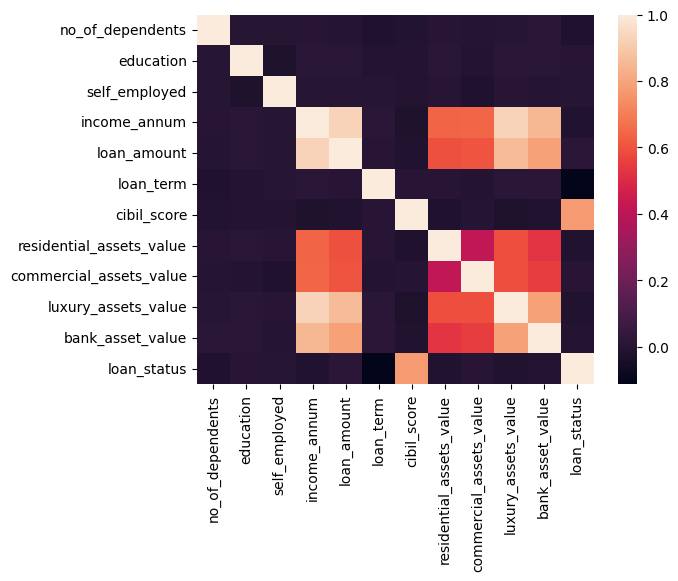

In [279]:
import seaborn as sns
%matplotlib inline
# calculate the correlation matrix on the numeric columns
corr = data.select_dtypes('number').corr()
# plot the heatmap
sns.heatmap(corr)

In [280]:
from sklearn.preprocessing import StandardScaler

# Scale numerical features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_cleaned)

# Convert scaled data back to DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=data_cleaned.columns)

# Display the first few rows of the scaled data
print(scaled_df.head())



   no_of_dependents  education  self_employed  income_annum  loan_amount  \
0         -0.293443   0.993412      -1.007107      1.641471     1.657663   
1         -1.473344  -1.006632       0.992943     -0.331231    -0.314382   
2          0.296507   0.993412      -1.007107      1.462135     1.635380   
3          0.296507   0.993412      -1.007107      1.139329     1.746795   
4          1.476407  -1.006632       0.992943      1.713206     1.022598   

   loan_term  cibil_score  residential_assets_value  commercial_assets_value  \
0   0.193909     1.032906                 -0.780184                 2.953092   
1  -0.506645    -1.062326                 -0.733037                -0.628655   
2   1.595019    -0.545773                 -0.041541                -0.093719   
3  -0.506645    -0.772128                  1.702912                -0.372816   
4   1.595019    -1.265465                  0.791396                 0.766831   

   luxury_assets_value  bank_asset_value  loan_status  
0     

In [281]:
# Separate features (X) and target (y)
X = scaled_df.drop(columns=['loan_status'])
y = scaled_df['loan_status']


In [282]:
# Ensure y is an integer type
y = y.astype(int)
print("Unique values in 'y':", y.unique())


Unique values in 'y': [ 0 -1]


In [283]:
from sklearn.model_selection import train_test_split

# Split the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [284]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Initialize and train the Logistic Regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
# Make predictions
y_pred_logistic = logistic_model.predict(X_test)

# Evaluate the model
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logistic))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logistic))
print("Classification Report:\n", classification_report(y_test, y_pred_logistic))


Logistic Regression Accuracy: 0.8962264150943396
Confusion Matrix:
 [[296  39]
 [ 49 464]]
Classification Report:
               precision    recall  f1-score   support

          -1       0.86      0.88      0.87       335
           0       0.92      0.90      0.91       513

    accuracy                           0.90       848
   macro avg       0.89      0.89      0.89       848
weighted avg       0.90      0.90      0.90       848



In [285]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the model
decision_tree_model = DecisionTreeClassifier()

# Train the model
decision_tree_model.fit(X_train, y_train)

# Make predictions
y_pred_tree = decision_tree_model.predict(X_test)

# Evaluate the model
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tree))
print("Classification Report:\n", classification_report(y_test, y_pred_tree))


Decision Tree Accuracy: 0.9740566037735849
Confusion Matrix:
 [[323  12]
 [ 10 503]]
Classification Report:
               precision    recall  f1-score   support

          -1       0.97      0.96      0.97       335
           0       0.98      0.98      0.98       513

    accuracy                           0.97       848
   macro avg       0.97      0.97      0.97       848
weighted avg       0.97      0.97      0.97       848



In [286]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
random_forest_model = RandomForestClassifier(random_state=42)

# Train the model
random_forest_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = random_forest_model.predict(X_test)

# Evaluate the model
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.9823113207547169
Confusion Matrix:
 [[328   7]
 [  8 505]]
Classification Report:
               precision    recall  f1-score   support

          -1       0.98      0.98      0.98       335
           0       0.99      0.98      0.99       513

    accuracy                           0.98       848
   macro avg       0.98      0.98      0.98       848
weighted avg       0.98      0.98      0.98       848



In [287]:
from sklearn.ensemble import GradientBoostingClassifier


# Initialize the model
gbm_model = GradientBoostingClassifier(random_state=42)

# Train the model
gbm_model.fit(X_train, y_train)

# Make predictions
y_pred_gbm = gbm_model.predict(X_test)

# Evaluate the model
print("GBM Accuracy:", accuracy_score(y_test, y_pred_gbm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gbm))
print("Classification Report:\n", classification_report(y_test, y_pred_gbm))


GBM Accuracy: 0.9752358490566038
Confusion Matrix:
 [[324  11]
 [ 10 503]]
Classification Report:
               precision    recall  f1-score   support

          -1       0.97      0.97      0.97       335
           0       0.98      0.98      0.98       513

    accuracy                           0.98       848
   macro avg       0.97      0.97      0.97       848
weighted avg       0.98      0.98      0.98       848



In [290]:
from sklearn.neural_network import MLPClassifier

# Initialize the model
mlp_model = MLPClassifier(random_state=42, max_iter=1000)

# Train the model
mlp_model.fit(X_train, y_train)

# Make predictions
y_pred_mlp = mlp_model.predict(X_test)

# Evaluate the model
print("Neural Network Accuracy:", accuracy_score(y_test, y_pred_mlp))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_mlp))
print("Classification Report:\n", classification_report(y_test, y_pred_mlp))


Neural Network Accuracy: 0.9575471698113207
Confusion Matrix:
 [[317  18]
 [ 18 495]]
Classification Report:
               precision    recall  f1-score   support

          -1       0.95      0.95      0.95       335
           0       0.96      0.96      0.96       513

    accuracy                           0.96       848
   macro avg       0.96      0.96      0.96       848
weighted avg       0.96      0.96      0.96       848

